## MLP for Binary Classification

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



In [1]:
# Importing Libraries

# Your code to import read_csv class from pandas
import pandas as pd
# Your code to import train_test_split class from sklearn. Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [20]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# Your code to read the csv from the above path.
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv", header=None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [21]:
# Your code to print first few rows of the dataset.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use dataframe.info() from pandas library


In [22]:
# Your code to print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe. Select suitable API call from the pandas library

In [23]:
# Your code to print the shape of the dataset
df.shape

(351, 35)

# Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [25]:
X = df.values[:, :-1]
# Your code to get y - Hint y = df.values[:, some parameters]
y = df.values[:,-1]
y

array(['g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b

We have converted everthing in X to 'float' and the letters in column y to the numbers in the following cell.

In [26]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

Printing the genral information of the X and y in the following cell

In [28]:
# Your code to print X
print("X: " , X , sep="\n")
# Your code to print y
print("y: " , y , sep="\n")
# your code to print shape of X. Remember X is a numpy array
print("X Shape: ", X.shape)
# your code to print shape of y. Remember y is a numpy array
print("Y Shape: ", y.shape)

X: 
[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
y: 
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

* Separate X and y into training and test set with a ratio of your choice.
* Print the shapes of the resulting arrays.
* Get the number of features from X_train. Remember the number of features are the number of inputs.

Use sklearn train_test_split class.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [48]:
# Your code to separate the data into trauning and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Your code to print shape of X_train
print("X_train Shape: ", X_train.shape)
# Your code to print shape of X_test
print("X_test Shape: ", X_test.shape)
# Your code to print shape of y_train
print("y_train Shape: ", y_train.shape)
# Your code to print shape of X_test
print("y_test Shape: ", y_test.shape)


n_features = X_train.shape[1]

X_train Shape:  (245, 34)
X_test Shape:  (106, 34)
y_train Shape:  (245,)
y_test Shape:  (106,)


# Creating a Multi-layer Perceptron using Keras.
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [57]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
#
# Add as many layers with activation functions of your choice
#
model.add(Dense(1, activation='sigmoid'))

In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

Epoch 1/150
8/8 [==============================] - 2s 5ms/step - loss: 0.6979 - accuracy: 0.6898
Epoch 2/150
8/8 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.6898
Epoch 3/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6980
Epoch 4/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6939
Epoch 5/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6980
Epoch 6/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.7061
Epoch 7/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7102
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7224
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7306
Epoch 10/150
8/8 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7347
Epoch 11/150
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9224
Epoch 85/150
8/8 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9265
Epoch 86/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2139 - accuracy: 0.9265
Epoch 87/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9265
Epoch 88/150
8/8 [==============================] - 0s 4ms/step - loss: 0.2109 - accuracy: 0.9224
Epoch 89/150
8/8 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9224
Epoch 90/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9224
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9306
Epoch 92/150
8/8 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9306
Epoch 93/150
8/8 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9306
Epoch 94/150
8/8 [===============

** How much accuracy have you got? Compare the accuracy with your peers. **
** Now, change your model and activation function to get the better accuracy as compared to your peers **

## **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

## In addition to the accuracy, also document the output of the neural network as provided in Task 2.



Next, we have provided the code to predict on an unknown value.
We will cover these concepts later in the class. For now, just run the code to see the prediction.

In [87]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 62ms/step
Predicted: 0.950


C:\Users\sasen\AppData\Local\Temp\ipykernel_1880\3885243746.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


### Try out the same model with Keras Functional models!
Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

In [98]:
model_1 = Sequential()
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(128, activation='relu', input_shape=(n_features,)))
model_1.add(Dense(1, activation='sigmoid', input_shape=(n_features,)))

In [99]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_1.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

loss, acc = model_1.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

Epoch 1/30
8/8 [==============================] - 2s 5ms/step - loss: 0.6402 - accuracy: 0.6490
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.4523 - accuracy: 0.8204
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9224
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.9469
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9796
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9796
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9837
Epoch 8/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9837
Epoch 9/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9755
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9837
Epoch 11/30
8/8 [======================

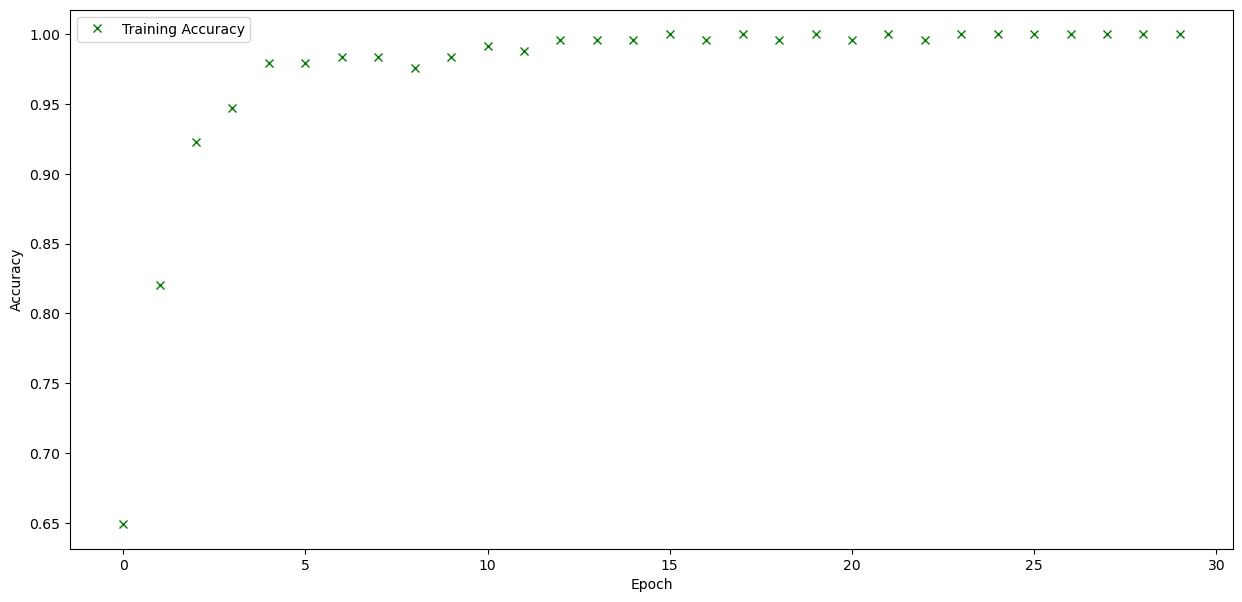

In [100]:
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num = 1, figsize=(15,7))
plt.plot(Accuracy, "gx", label = "Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [91]:
print(model_1.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_211 (Dense)           (None, 128)               4480      
                                                                 
 dense_212 (Dense)           (None, 128)               16512     
                                                                 
 dense_213 (Dense)           (None, 128)               16512     
                                                                 
 dense_214 (Dense)           (None, 128)               16512     
                                                                 
 dense_215 (Dense)           (None, 128)               16512     
                                                                 
 dense_216 (Dense)           (None, 1)                 129       
                                                                 
Total params: 70657 (276.00 KB)
Trainable params: 706

In [101]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 63ms/step
Predicted: 0.950


C:\Users\sasen\AppData\Local\Temp\ipykernel_1880\3885243746.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)
